In [ ]:
import json

# Load configuration and define a global variable
def load_config():
    global config
    with open('config_Heatmap.json') as config_file:
        config = json.load(config_file)

# Call the function to load the configuration
load_config()

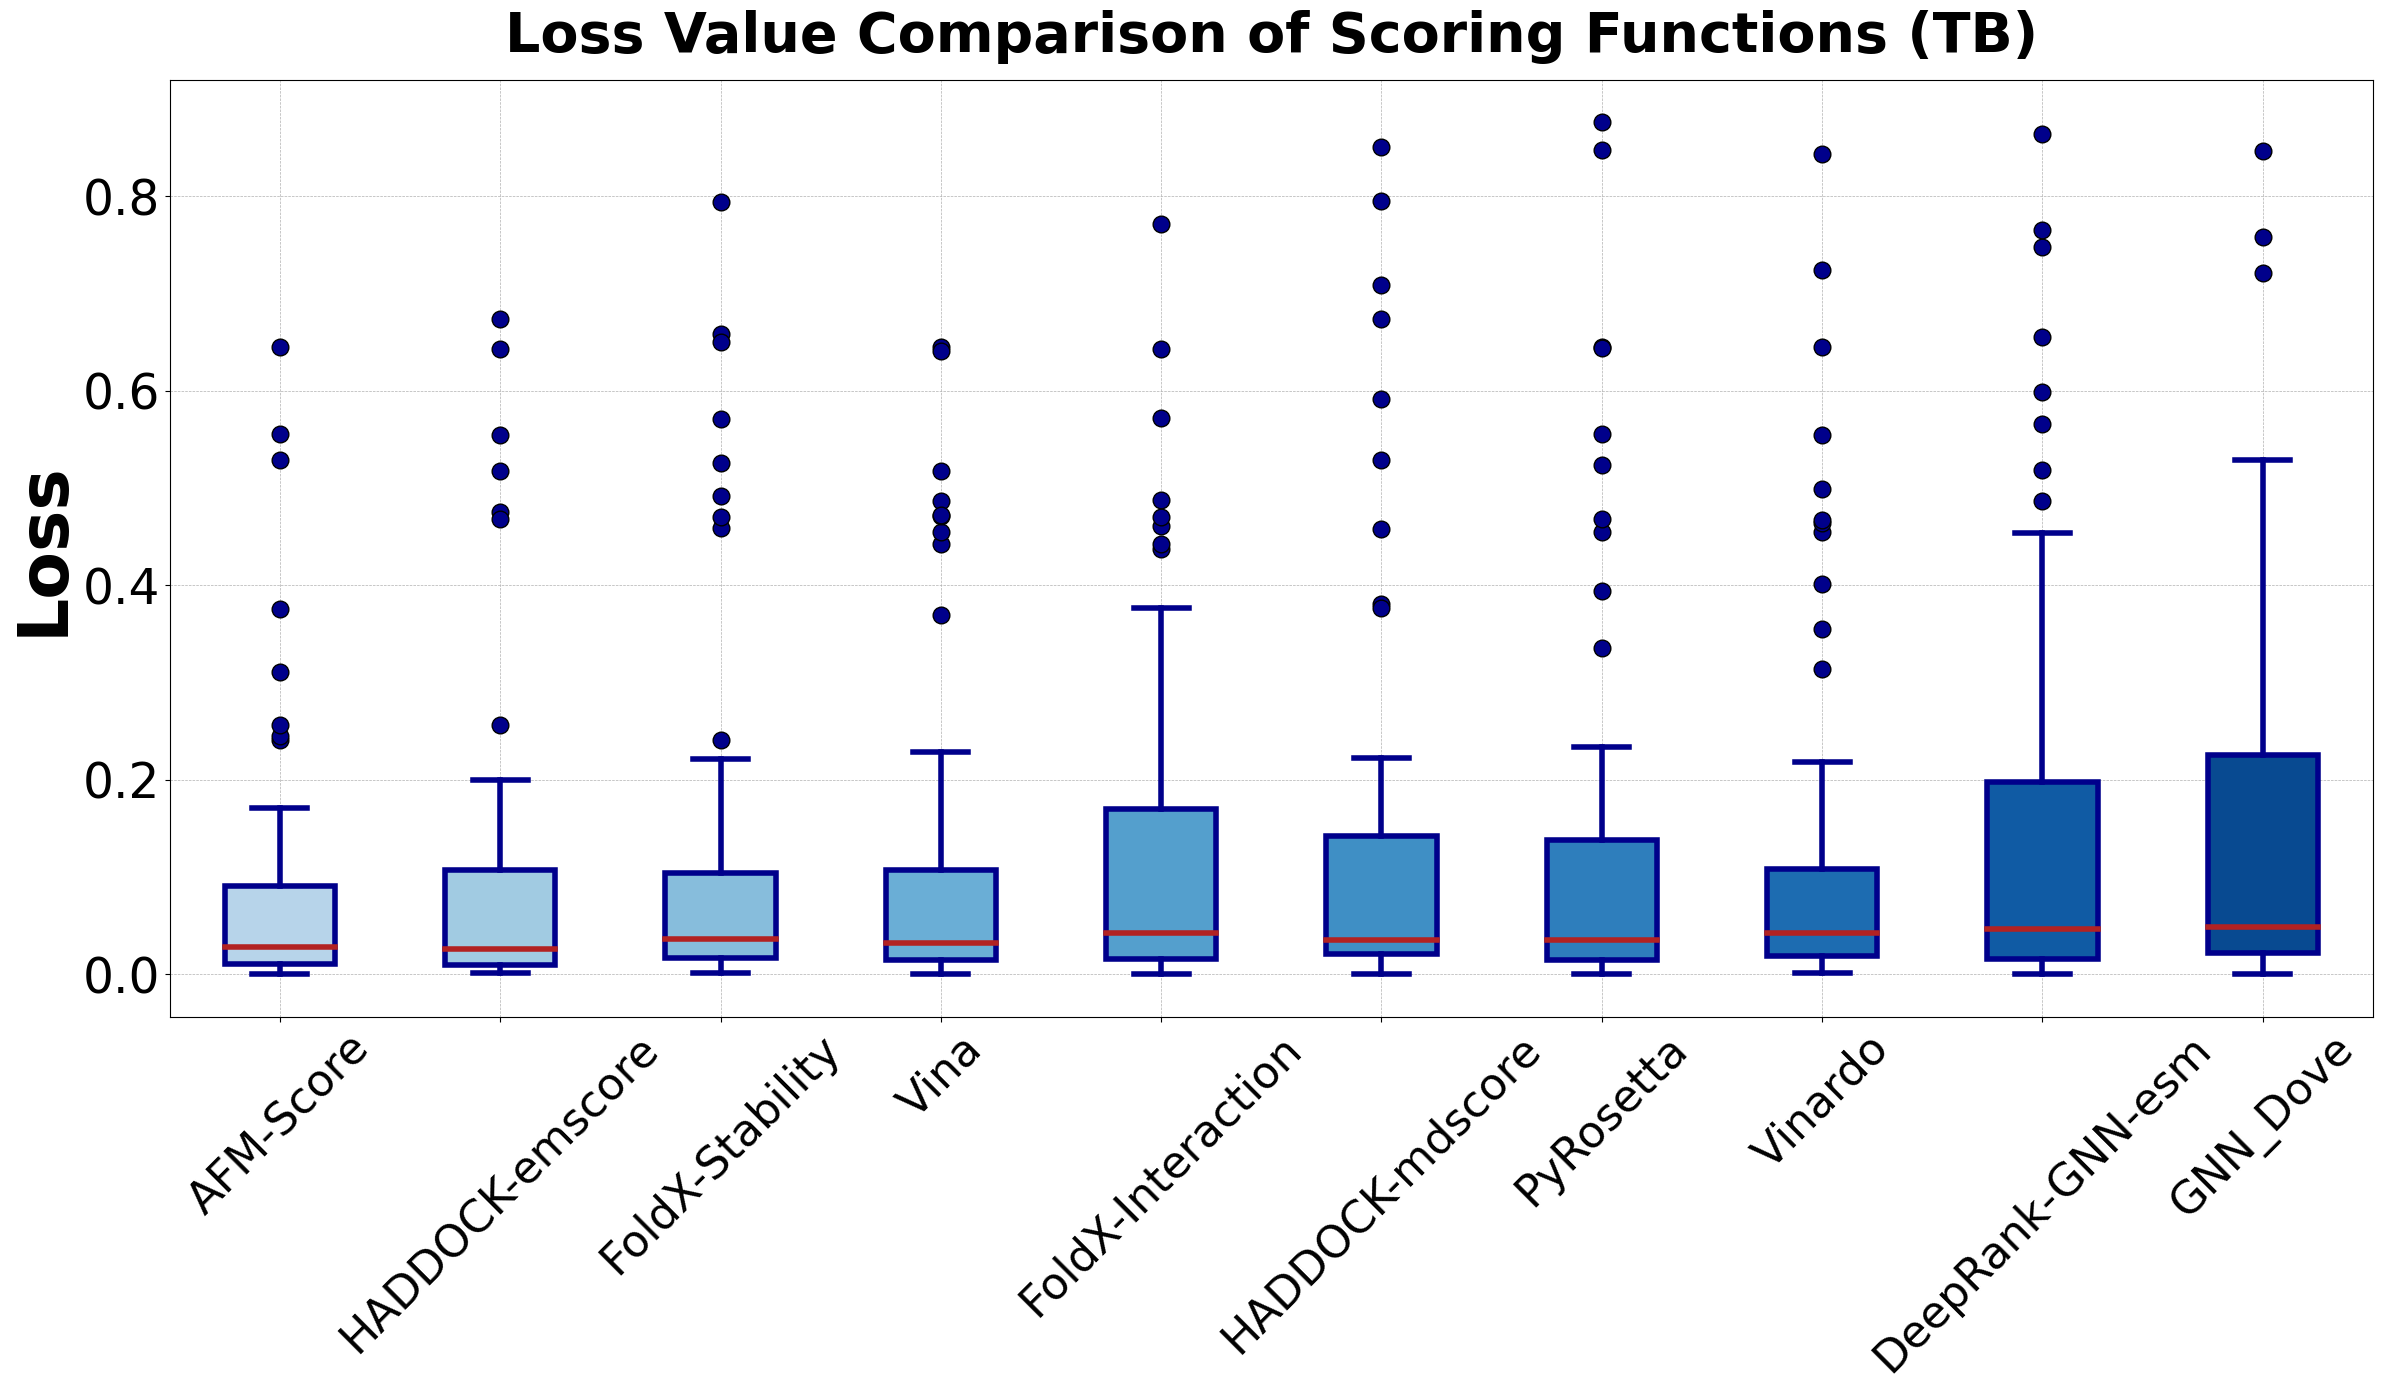

Statistics for each box in the plot:

AFM-Score:
Mean: 0.08695541308788478
Median: 0.028176723638076273
Q1 (25th percentile): 0.010520286086441092
Q3 (75th percentile): 0.09099643371135557
IQR: 0.08047614762491448
Minimum: 0.000154594958158949
Maximum: 0.6446476925764134
Spread: 0.6444930976182545

HADDOCK-emscore:
Mean: 0.09887811970244313
Median: 0.02634131808008975
Q1 (25th percentile): 0.010136086077170507
Q3 (75th percentile): 0.10756590071054942
IQR: 0.09742981463337891
Minimum: 0.0009256935780841413
Maximum: 0.6738362292953588
Spread: 0.6729105357172747

FoldX-Stability:
Mean: 0.12094961828792225
Median: 0.03589597710182646
Q1 (25th percentile): 0.016948673437087225
Q3 (75th percentile): 0.10409692264695744
IQR: 0.08714824920987022
Minimum: 0.001117841438496137
Maximum: 0.7944059930214831
Spread: 0.7932881515829869

Vina:
Mean: 0.12110295108101239
Median: 0.03191361506211704
Q1 (25th percentile): 0.015108978053440747
Q3 (75th percentile): 0.10711167635698329
IQR: 0.0920026983035

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import json

# Load configuration and define a global variable
def load_config():
    global config
    with open('config_Heatmap.json') as config_file:
        config = json.load(config_file)

# Call the function to load the configuration
load_config()

# Set the directory path as specified in the configuration file
directory_path = config['DockQ_Loss_directory_TB']

# Construct file paths
file_paths = {
    'AFM-Score': os.path.join(directory_path, "AlphaFold_TB.xlsx"),
    'PyRosetta': os.path.join(directory_path, "Pyrosetta_TB.xlsx"),
    'FoldX-Stability': os.path.join(directory_path, "Foldx_stability_TB.xlsx"),
    'FoldX-Interaction': os.path.join(directory_path, "Foldx_Interaction_TB.xlsx"),
    'HADDOCK-emscore': os.path.join(directory_path, "Haddock_emscore_TB.xlsx"),
    'HADDOCK-mdscore': os.path.join(directory_path, "Haddock_mdscore_TB.xlsx"),
    'GNN_Dove': os.path.join(directory_path, "gnn_dove_TB.xlsx"),
    'Vina': os.path.join(directory_path, "Vina_loss_TB.xlsx"),
    'Vinardo': os.path.join(directory_path, "Vinardo_loss_TB.xlsx"),
    'DeepRank-GNN-esm': os.path.join(directory_path, "Deep_GNN_TB.xlsx")
}

# Load the data from the Excel files into DataFrames
data_frames = {label: pd.read_excel(path) for label, path in file_paths.items()}

# Prepare the data for plotting
data_to_plot = [df['Loss'].dropna() for df in data_frames.values()]

# Calculate means and sort data by mean values
means = [np.mean(data) for data in data_to_plot]
sorted_indices = np.argsort(means)
data_to_plot_sorted = [data_to_plot[i] for i in sorted_indices]
labels_sorted = [list(data_frames.keys())[i] for i in sorted_indices]

# Create the boxplot
plt.figure(figsize=(24, 14))
boxplot = plt.boxplot(data_to_plot_sorted, labels=labels_sorted, patch_artist=True,
                      boxprops=dict(linestyle='-', linewidth=4, color='darkblue'),
                      medianprops=dict(linestyle='-', linewidth=4, color='firebrick'),
                      whiskerprops=dict(linestyle='-', linewidth=4, color='darkblue'),
                      capprops=dict(linestyle='-', linewidth=4, color='darkblue'),
                      flierprops=dict(marker='o', markerfacecolor='darkblue', markersize=12, linestyle='none'))

# Set colors for each box
colors = plt.cm.Blues(np.linspace(0.3, 0.9, len(labels_sorted)))
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Set titles and labels with increased font size
plt.title('Loss Value Comparison of Scoring Functions (TB)', fontsize=40, fontweight='bold', pad=20)
plt.ylabel('Loss', fontsize=50, fontweight='bold')
#plt.xlabel('Scoring Functions', fontsize=37, fontweight='bold')
plt.xticks(rotation=45, fontsize=32)
plt.yticks(fontsize=35)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

# Define save path and save the plot
save_path = f"{config['Main_Figures_directory']}/Fig_5a_1.png"
plt.savefig(save_path, dpi=1000, facecolor='white')

plt.show()

# Print statistics for each box
print("Statistics for each box in the plot:")
for label, data in zip(labels_sorted, data_to_plot_sorted):
    mean = np.mean(data)
    median = np.median(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    minimum = data.min()
    maximum = data.max()
    spread = maximum - minimum
    print(f"\n{label}:")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Q1 (25th percentile): {q1}")
    print(f"Q3 (75th percentile): {q3}")
    print(f"IQR: {iqr}")
    print(f"Minimum: {minimum}")
    print(f"Maximum: {maximum}")
    print(f"Spread: {spread}")

# Answering the questions
print("\nThe red line in each box plot represents the median value of the data.")
print("The plot is sorted based on the mean values of the 'Loss' data for each scoring function.")